# Trabajo Final Analisis Predictivo Javier Gilabert Sabater

# Limpieza de Datos

In [2]:
import numpy as np
import pandas as pd

#obtain hierarchical dataset
from datasetsforecast.hierarchical import HierarchicalData

# compute base forecast no coherent
from statsforecast.core import StatsForecast
from statsforecast.models import AutoARIMA, Naive

/Users/javiersendraestruch/anaconda3/envs/Modelos_predictivos/lib/python3.10/site-packages/statsforecast/core.py:25: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [3]:
### Leer documento
df = pd.read_csv("H2.csv", sep = ",")

In [4]:
df.ReservationStatus.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [5]:
df.IsCanceled.unique()

array([0, 1])

In [6]:
# df.iloc[:8]
# Vemos como los valores "No-Show" y "Canceled" son clasificados como 1, "Check-out" esta clasificado como 0

In [7]:
import pandas as pd

# Supongamos que tu DataFrame se llama df y la columna de meses es 'Month'
# Creamos un diccionario de mapeo de nombres de meses a números
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Aplicamos el mapeo a la columna 'Month' para convertir los nombres de meses a números
df['mes_numerico'] = df['ArrivalDateMonth'].map(month_mapping)

In [8]:
import pandas as pd

# Assuming your DataFrame is named df
# Create a new column 'ArrivalDate' by combining the year, month, week number, and day of month
df['ArrivalDate'] = pd.to_datetime(df['ArrivalDateYear'].astype(str) + '-' +
                                    df['mes_numerico'].astype(str) + '-' +
                                    df['ArrivalDateDayOfMonth'].astype(str))

# Drop the individual columns if needed
df = df.drop(['ArrivalDateYear', 'ArrivalDateMonth', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth', 'mes_numerico'], axis=1)


In [9]:
df = df.set_index('ArrivalDate')
df.head()

,IsCanceled,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
ArrivalDate,,,,,,,,,,,,,,,,,,,,,
2015-07-01,0,6,0,2,1,0.0,0,HB,PRT,Offline TA/TO,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
2015-07-01,1,88,0,4,2,0.0,0,BB,PRT,Online TA,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2015-07-01,1,65,0,4,1,0.0,0,BB,PRT,Online TA,...,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
2015-07-01,1,92,2,4,2,0.0,0,BB,PRT,Online TA,...,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
2015-07-02,1,100,0,2,2,0.0,0,BB,PRT,Online TA,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


In [10]:
df_status = df.iloc[:, :1]
df_status

,IsCanceled
ArrivalDate,
2015-07-01,0
2015-07-01,1
2015-07-01,1
2015-07-01,1
2015-07-02,1
...,...
2017-08-30,0
2017-08-31,0
2017-08-31,0


In [11]:
# Hacer un resample con periodos semanales
df_w = df_status.resample("W").sum()
df_w.tail()

,IsCanceled
ArrivalDate,
2017-08-06,703
2017-08-13,717
2017-08-20,797
2017-08-27,678
2017-09-03,349


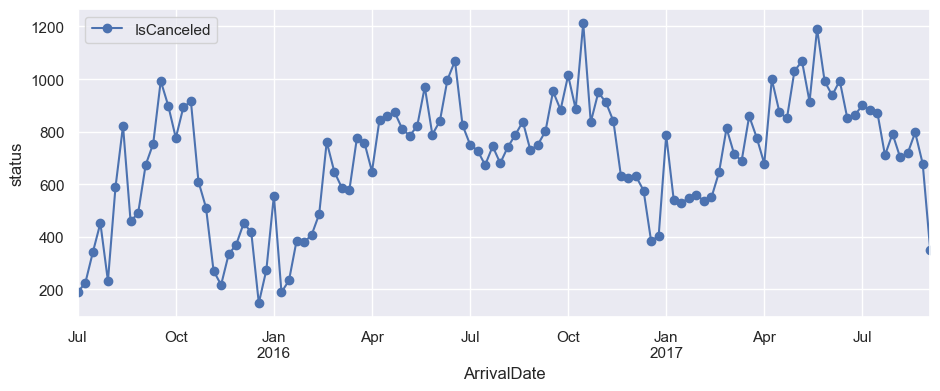

In [12]:
# Graficar las cancelaciones
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
ax = df_w.plot(marker='o', linestyle='-')
ax.set_ylabel('status');

In [13]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

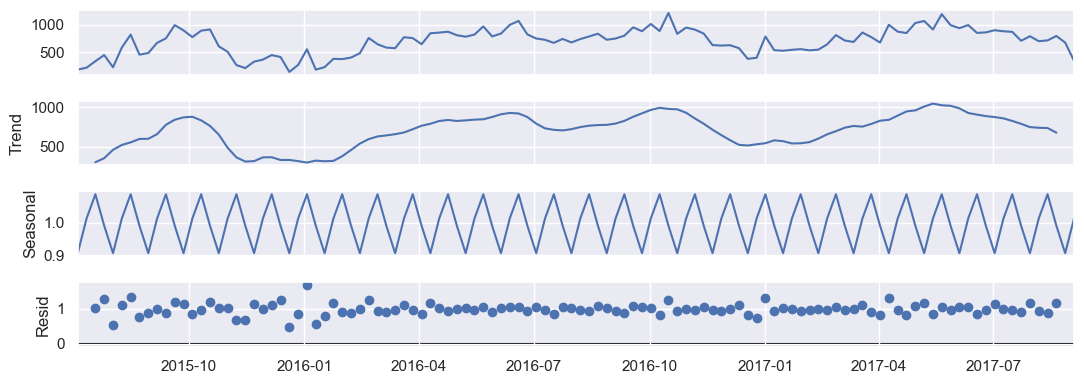

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_w['IsCanceled'], 
                                   model='multiplicative', 
                                   period=4)
decomposition.plot();

In [16]:
 ## Calculamos la transformacion logarítmica

Realizar la transformación logarítmica ayuda a estabilizar la varianza y a efatizar los cambios relativos

In [17]:
# Log Transformer Function
from sktime.transformations.series.boxcox import LogTransformer

In [18]:
# Apply Log Transformer

transformer = LogTransformer()
log_df_w = transformer.fit_transform(df_w)
log_df_w.tail()

,IsCanceled
ArrivalDate,
2017-08-06,6.555357
2017-08-13,6.575076
2017-08-20,6.680855
2017-08-27,6.519147
2017-09-03,5.855072


Text(0.5, 1.0, 'Cancelaciones: Transformación LOG')

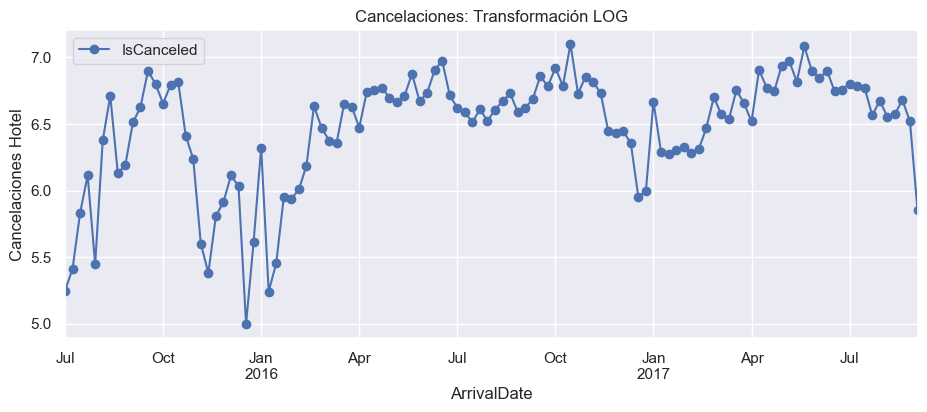

In [19]:
# Plot Log Data
ax = log_df_w.plot(marker='o', linestyle='-')
ax.set_ylabel('Cancelaciones Hotel')
ax.set_title('Cancelaciones: Transformación LOG')

Text(0.5, 1.0, 'Cancelaciones: Transformación LOG')

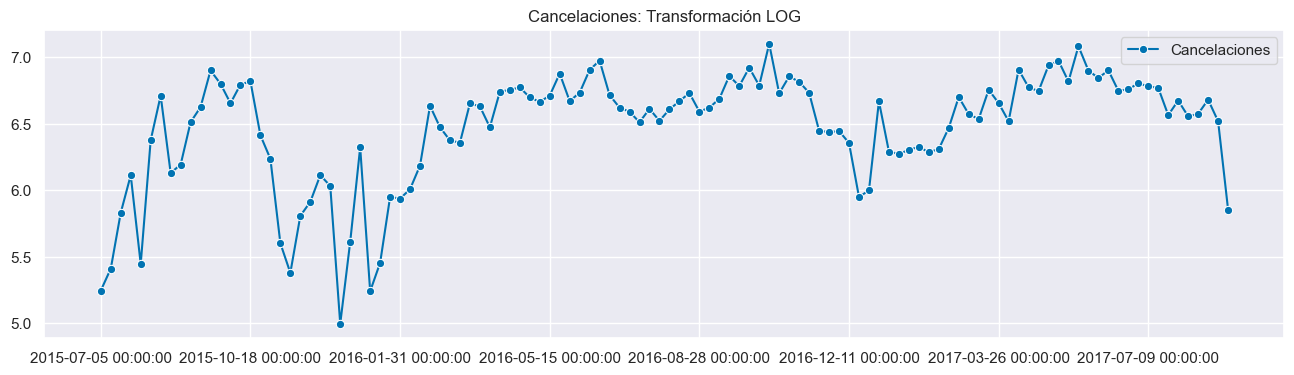

In [20]:
# Plot Log Data
from sktime.utils.plotting import plot_series
fig, ax =plot_series(log_df_w, labels=["Cancelaciones"])
ax.set_title('Cancelaciones: Transformación LOG')

Text(0.5, 1.0, 'Cancelaciones: Transformación LOG')

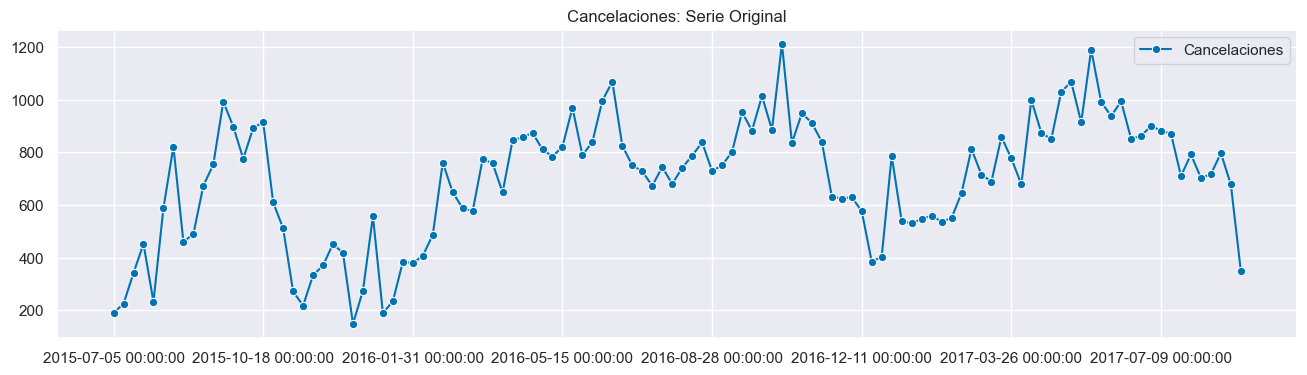

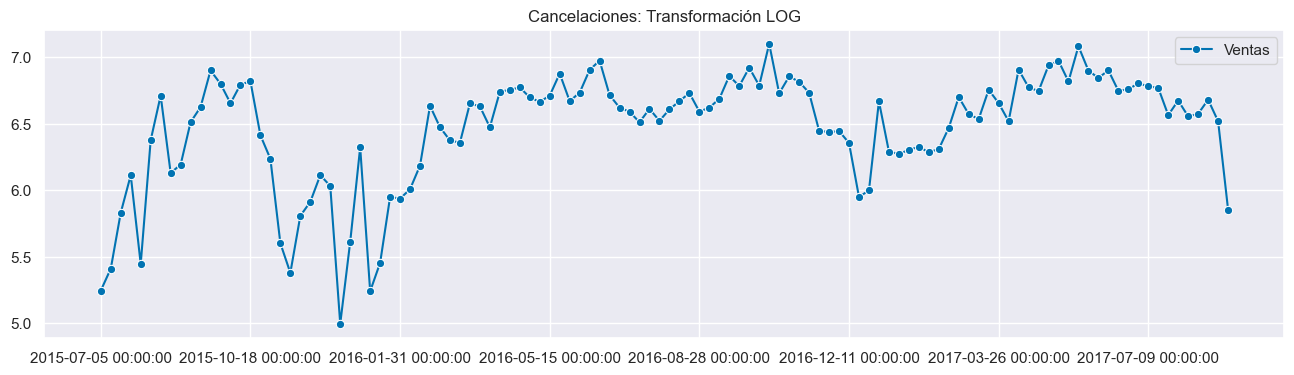

In [21]:
## Comparamos la transformacion logarítmica de la Serie Original y la Serie en Log
# Plot Log Data & Original Data
fig, ax =plot_series(df_w, labels=["Cancelaciones"])
ax.set_title('Cancelaciones: Serie Original')
fig, ax =plot_series(log_df_w, labels=["Ventas"])
ax.set_title('Cancelaciones: Transformación LOG')

### Vamos a calcular la correlacion de la serie en Log

In [22]:
# Autocorrelation Fuction Package
from sktime.utils.plotting import plot_correlations

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: >, <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

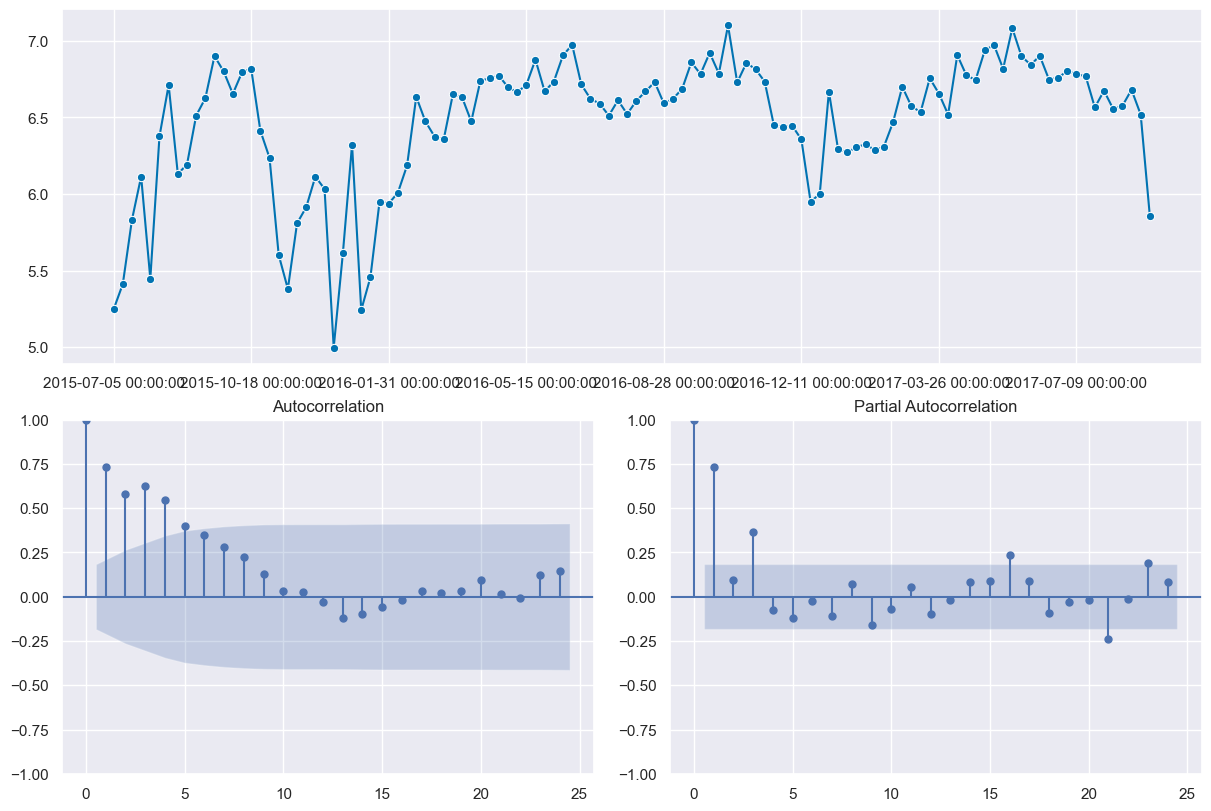

In [23]:
# Autocorrelation Fuction Original Time Series
plot_correlations(log_df_w)

Ahora, haremos una diferenciacion: La diferenciación es una técnica que se utiliza para hacer que una serie temporal sea estacionaria.

In [24]:
# Difference Fuction Package
from sktime.transformations.series.difference import Differencer

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: >, <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

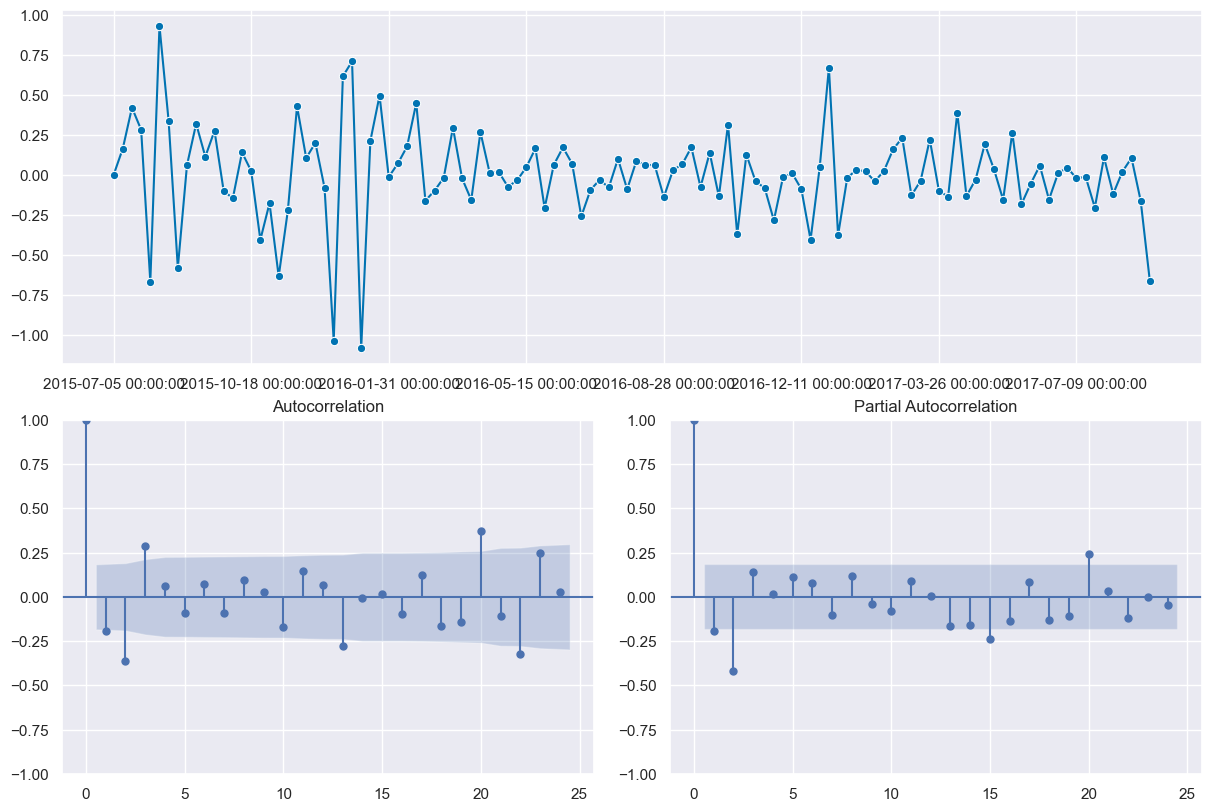

In [25]:
# Autocorrelation Fuction
# d=1; D=0; S=4
# 
transf_diff=Differencer(lags=[1])
plot_correlations(transf_diff.fit_transform(log_df_w))

Differencer es una clase o función que realiza la diferenciación, y estás especificando que se realice una diferenciación no estacional (d=1) con un lag de 1. De Lag 1, significa que se está diferenciando la serie temporal una vez sin tener en cuenta patrones estacionales

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: >, <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

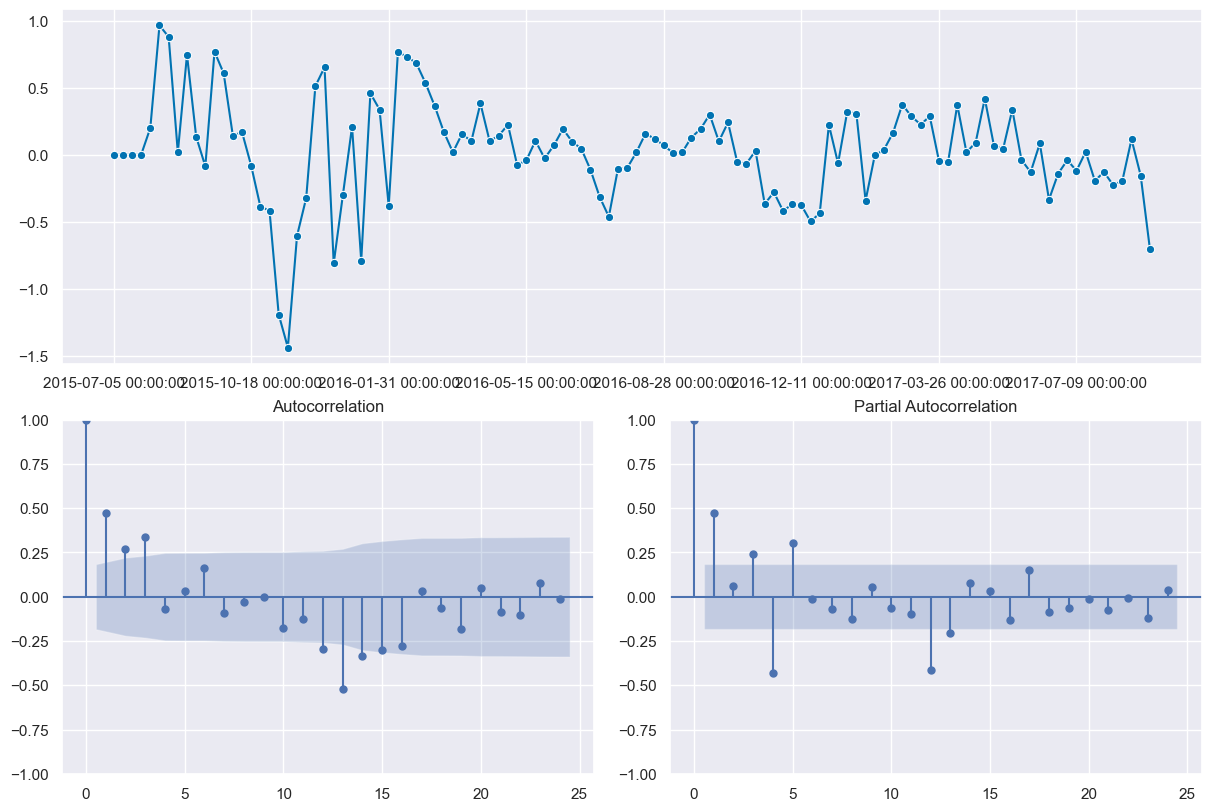

In [26]:
# Autocorrelation Fuction
# d=0; D=1; S=4
# 
transf_diff=Differencer(lags=[4])
plot_correlations(transf_diff.fit_transform(log_df_w))

La diferenciación estacional implica tomar la diferencia entre los valores de la serie temporal en el mismo punto en diferentes estaciones o períodos, y en este caso, el período es de 4 unidades de tiempo (en este caso, semanas).

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: >, <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

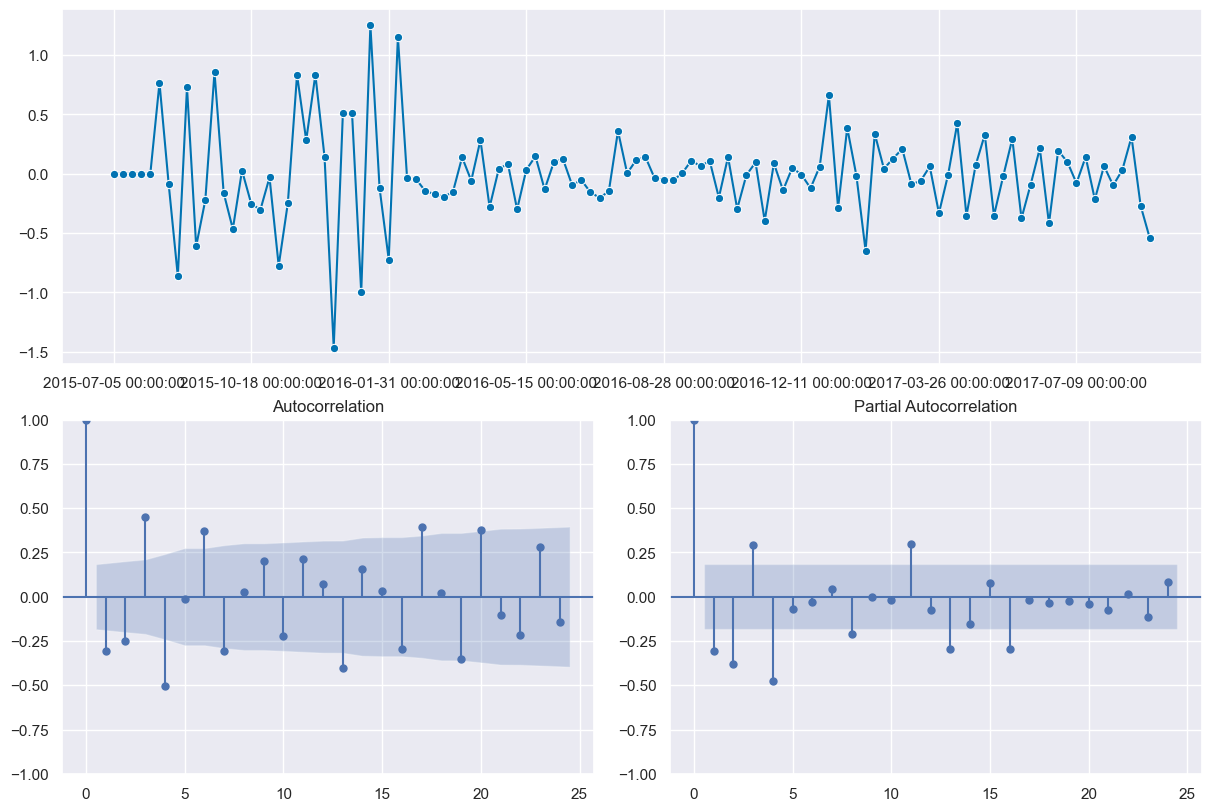

In [27]:
# Autocorrelation Fuction
# d=1; D=1; S=4
# 
transf_diff=Differencer(lags=[1,4])
plot_correlations(transf_diff.fit_transform(log_df_w))

Dos lags especificados: 1 y 4. Dos tipos de diferenciación:
Diferenciación no estacional (lags=[1]): Se tomará la diferencia entre cada valor y su valor  anterior.
Diferenciación estacional (lags=[4]): Se tomará la diferencia entre cada valor y su valor hace 4 períodos de tiempo (en este caso, semanas).

In [28]:
#Dividir el dataset

# Sktime fucntions
# Forecast horizon and Split function 
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split

110 4


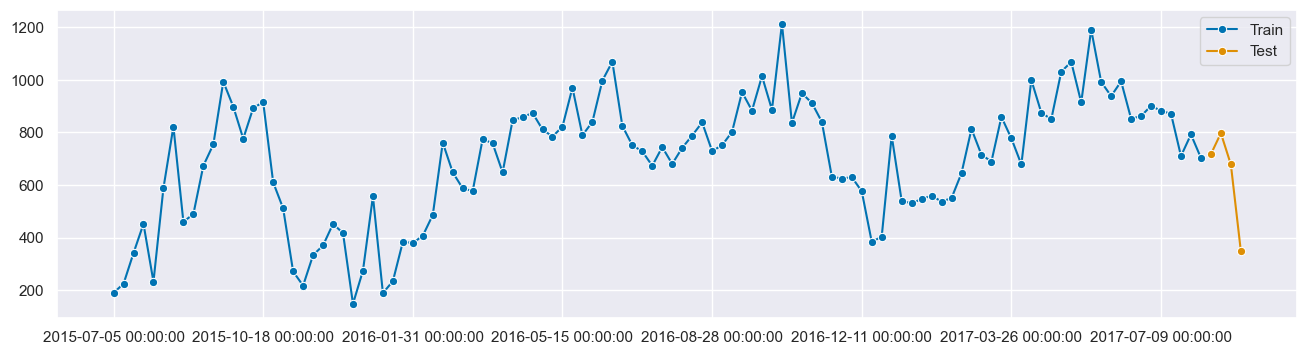

In [29]:
# Separamos train y test- test como esta por semanas quitamos 4

# Select Train & test sample
# we will try to forecast y_test from y_train
# plotting for illustration
# original and log samples
y_train, y_test = temporal_train_test_split(y =df_w, test_size=4)
log_y_train, log_y_test = temporal_train_test_split(y =log_df_w, test_size=4)
plot_series(y_train, y_test, labels=["Train", "Test"])
# Time Series Size
print(y_train.shape[0], y_test.shape[0])

In [30]:
# comprobamos cuanto tiempo adelante estamos prediciendo

# Forecast Horizon
fh = np.arange(len(y_test)) + 1  # forecasting horizon
fh

array([1, 2, 3, 4])

In [31]:
# Sktime Auto ARIMA Function
from sktime.forecasting.arima import AutoARIMA

In [32]:
#  Auto ARIMA Model

# Nosotros ajustaremos el modelo con 52 temporadas que son las semanas que tiene un año
forecaster = AutoARIMA(sp=52, suppress_warnings=True)
forecaster.fit(log_y_train)

AutoARIMA(sp=52, suppress_warnings=True)

In [33]:
#  Auto ARIMA Model Summary
print(forecaster.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  110
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 52)   Log Likelihood                  -8.838
Date:                            Sat, 16 Dec 2023   AIC                             23.677
Time:                                    18:36:44   BIC                             31.751
Sample:                                07-05-2015   HQIC                            26.951
                                     - 08-06-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3977      0.064     -6.206      0.000      -0.523      -0.272
ma.S.L52       0.4927      0.258   

In [34]:
#  Auto ARIMA Forecast
log_y_pred = forecaster.predict(fh)
log_y_pred

,IsCanceled
2017-08-13,6.521468
2017-08-20,6.658656
2017-08-27,6.581712
2017-09-03,6.536141


In [35]:
#  Auto ARIMA Forecast
# Original Time series (Invert log transformation)
np.exp(log_y_pred)

,IsCanceled
2017-08-13,679.575071
2017-08-20,779.502574
2017-08-27,721.774188
2017-09-03,689.619852


## Vamos a estudiar el rendimiento de nuestros modelos predictores

In [36]:
# Sktime fucntions
# Forecast Accuracy MAPE & MSE & RMSE
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import MeanSquaredError

In [37]:
# Forecast Accuracy
# MAPE
mean_absolute_percentage_error(log_y_test, log_y_pred)

0.034348554221662185

In [38]:
# Forecast Accuracy
# MAPE 
# Orignal Time Serie

mean_absolute_percentage_error(y_test, np.exp(log_y_pred))

0.2786756192288662

In [39]:
# Forecast Accuracy
#Mean Squared Error
rmse = MeanSquaredError(square_root=True)
rmse(log_y_test, log_y_pred)

0.3431965234811759

In [40]:
# Forecast Accuracy
#Mean Squared Error
rmse = MeanSquaredError(square_root=True)
rmse(y_test, np.exp(log_y_pred))

172.94858216096767

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

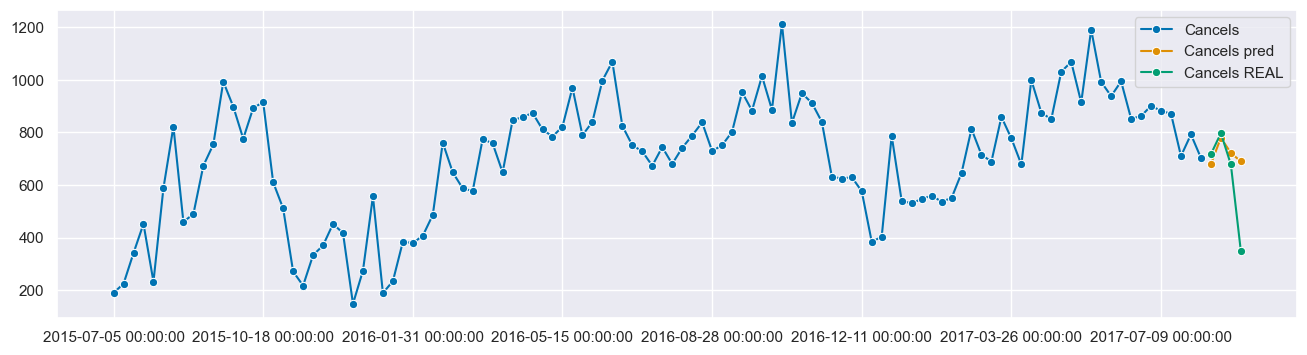

In [41]:
# Forecast Accuracy Plot
# Plotting predictions and past data
plot_series(y_train, np.exp(log_y_pred),y_test, labels=["Cancels", "Cancels pred", "Cancels REAL"])

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

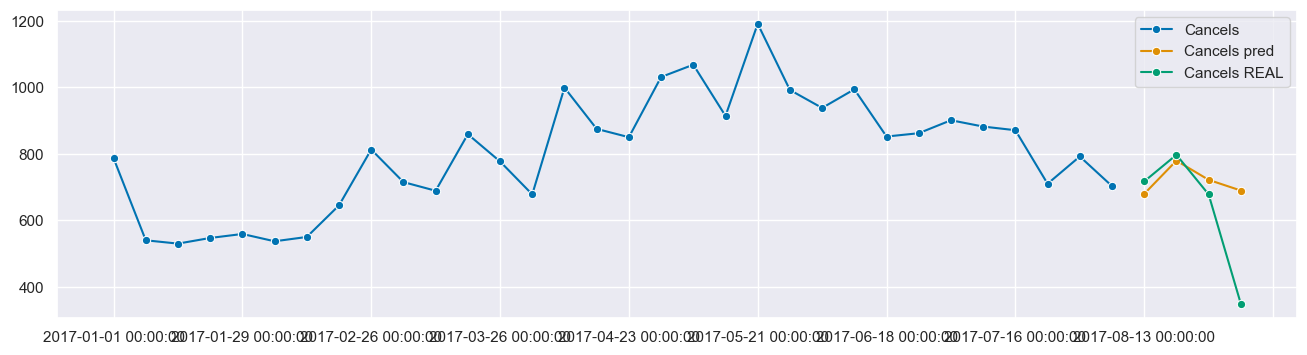

In [42]:
# Forecast Accuracy Plot
# Plotting predictions and past data
# Zoom 2017 -
plot_series(y_train["2017":], np.exp(log_y_pred),y_test, labels=["Cancels", "Cancels pred", "Cancels REAL"])